<a href="https://colab.research.google.com/github/drusho/data_analysis/blob/main/Mothers_Day_Google_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Mother's Day and Google Trends__

_Notebook is inspired by:_

_https://medium.com/the-data-science-publication/how-to-use-the-pytrends-api-to-get-google-trends-data-4378acbaaa8a_

Goal of this noteboook is to explore Google Trends for topics and keywords related to Mother's Day.  Other holidays such as Father's Day and Valentines Day were also compared in the analysis.

Interesting Findings:

Valentine's Day does not show the same popularity for Google Trends search as Mother's Day.  There has been a downward trend in popularity for the words Valentines Day.

Top result for Mothers Day search was Mother's Daughter a	Song by Miley Cyrus.  This probably occured because the Miley Cyrus was a feature singer on Saturday Night Live the day before Mother's Day.



In [ ]:
pip install pytrends

In [ ]:
# import the TrendReq method from the pytrends request module
from pytrends.request import TrendReq

# execute the TrendReq method by passing the host language (hl) and timezone (tz) parameters
pytrends = TrendReq(hl='en-US', tz=360)

In [ ]:
# build list of keywords
kw_list = ["Mother's Day","Father's Day","Valentine's Day","Groundhog Day"] 

# build the payload
pytrends.build_payload(kw_list, timeframe='2011-01-01 2021-05-23', geo='US')

In [ ]:
# import pandas module
import pandas as pd

# store interest over time information in df
df = pytrends.interest_over_time()

# display the top 20 rows in dataframe
print(df.tail(10))

            Mother's Day  Father's Day  ...  Groundhog Day  isPartial
date                                    ...                          
2020-08-01             1             1  ...              1      False
2020-09-01             1             1  ...              0      False
2020-10-01             1             1  ...              0      False
2020-11-01             1             1  ...              1      False
2020-12-01             1             1  ...              1      False
2021-01-01             1             1  ...              2      False
2021-02-01             2             1  ...             15      False
2021-03-01             7             2  ...              1      False
2021-04-01            30             3  ...              0      False
2021-05-01            94            11  ...              0       True

[10 rows x 5 columns]


In [ ]:

import plotly.graph_objects as go

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df["Father's Day"],
                    mode='lines',
                    name="Father's Day"))
                    # line = dict(color='cornflower blue')))

fig.add_trace(go.Scatter(x=df.index, y=df["Mother's Day"],
                    mode='lines',
                    name="Mother's Day"))
                    # line = dict(color='red')))

fig.add_trace(go.Scatter(x=df.index, y=df["Valentine's Day"],
                    mode='lines',
                    name="Valentine's Day"))
                    # line = dict(color='black')))

fig.add_trace(go.Scatter(x=df.index, y=df["Groundhog Day"],
                    mode='lines',
                    name="Groundhog Day"))
                    # line = dict(color='green')))

fig.update_layout(title_text='Interests Over Time',title_x=0.5)

fig.show()

In [ ]:
vday_2020 = df.loc['2020-02-09',"Valentine's Day"]
vday_2021 = df.loc['2021-02-07',"Valentine's Day"]

print("Valentine's Day search interest as of Feb 09, 2020: ",vday_2020)
print("Valentine's Day search interest as of Feb 07, 2021: ",vday_2021)

Valentine's Day search interest as of Feb 09, 2020:  90
Valentine's Day search interest as of Feb 07, 2021:  37


In [ ]:
# get interest by region
pytrends.interest_by_region(resolution='REGION', inc_low_vol=False, inc_geo_code=False).sort_values(by="Mother's Day",ascending=False).head(10)

,Mother's Day,Father's Day,Valentine's Day,Groundhog Day
geoName,,,,
Hawaii,52,22,23,3
Florida,47,23,25,5
California,47,23,25,5
Alaska,47,26,22,5
Louisiana,47,24,24,5
Oregon,47,23,21,9
Colorado,46,22,24,8
Connecticut,46,20,26,8
Nevada,46,24,25,5


In [ ]:
# get interest over time
pytrends.interest_over_time().sort_values(by="Mother's Day",ascending=False).iloc[:,[0]].head(10)

,Mother's Day
date,
2018-05-01,100
2020-05-01,95
2021-05-01,94
2012-05-01,90
2017-05-01,87
2019-05-01,84
2015-05-01,83
2016-05-01,81
2014-05-01,73


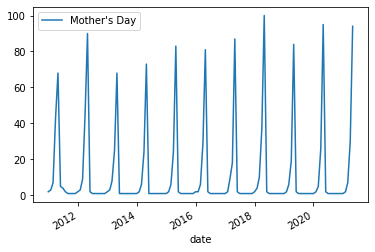

In [ ]:
pytrends.interest_over_time().sort_values(by="Mother's Day",ascending=False).iloc[:,[0]].plot()

In [ ]:
# get seach suggestions for "Mother's Day"
suggestions = pd.DataFrame.from_dict(pytrends.suggestions("Mother's Day"))
suggestions.iloc[:,[1,2]]

,title,type
0,Mother's Day,Celebration
1,Mother's Day,2016 film
2,Mothering Sunday,Celebration
3,Mother's Day,2010 film
4,Mothers and Daughters,2016 film


In [ ]:
# build the payload
pytrends.build_payload(kw_list=["Mother's Day"], 
                       timeframe='2020-01-01 2021-05-09', 
                       geo='US') 

# get related topics
df_rt = pytrends.related_topics()

In [ ]:
# top 10 rising results for Mothers Day
df_rt['Mothers Day']["rising"].head(10)

,value,formattedValue,link,topic_mid,topic_title,topic_type
0,18200,Breakout,/trends/explore?q=/g/11flbzhz4d&date=2020-01-0...,/g/11flbzhz4d,Mother's Daughter,Song by Miley Cyrus
1,90,+90%,/trends/explore?q=/m/0gly62&date=2020-01-01+20...,/m/0gly62,Edible Arrangements,Company
2,70,+70%,/trends/explore?q=/m/01z562&date=2020-01-01+20...,/m/01z562,Basket,Topic
3,70,+70%,/trends/explore?q=/m/09d4bv&date=2020-01-01+20...,/m/09d4bv,Flower delivery,Topic
4,70,+70%,/trends/explore?q=/m/02hcw1&date=2020-01-01+20...,/m/02hcw1,Floristry,Topic
5,50,+50%,/trends/explore?q=/m/0c9ph5&date=2020-01-01+20...,/m/0c9ph5,Flower,Topic


In [ ]:
# top 10 rising search results for Mothers Day
top_results = df_rt['Mothers Day']["rising"].head(10)

fig = go.Figure(data=[go.Bar(
    x=top_results.topic_title,
    y=top_results.value)])

fig.update_layout(title_text='Top 10 Rising Google Results for Mothers Day')

fig.show()

In [ ]:
# top 10 results for Mothers Day
top_results = df_rt['Mothers Day']["top"].head(10)

fig = go.Figure(data=[go.Bar(
    x=top_results.topic_title,
    y=top_results.value)])

fig.update_layout(title_text='Top 10 Google Results for Mothers Day',title_x=0.5)

fig.show()